#### this notebook is for using scipy curve\_fit to tweak parameters in a known form - specifically for variations in $\Omega_mh^2$

In [1]:
#from pysr import PySRRegressor, TemplateExpressionSpec

import matplotlib.pyplot as plt
import numpy as np

import camb

from scipy.optimize import curve_fit

In [2]:
# Load Data
pars     = np.load('../CL_data/parameter_omb2.npy')  # [H0, ombh2, omch2 ] x 100
lensed   = np.load('../CL_data/lensed_omb2.npy')     # [C_2, ..., C_5000] x 100 (lensed)
unlensed = np.load('../CL_data/unlensed_omb2.npy')     # [C_2, ..., C_5000] x 100 (unlensed)

In [3]:
np.min(pars[:,1])

0.0011381972683274604

In [4]:
#extracting info for independent variables
ombs = pars[:,1]
omcs = pars[:,2]

ells = np.array([l for l in range(2, 5000)])

In [5]:
#getting dependent variables
lensing = lensed/unlensed #lensing tail
camb_data_format = []
for i in range(len(lensing)):
    for j in range(len(lensing[i])):
        camb_data_format.append(lensing[i][j])

In [6]:
#the fidicual values for normalizing variables
fid_ombh2 = 0.0224
fid_omch2 = 0.12

In [82]:
def func(X, b1, b2):
    #expected form of the lensing tail function for curve fitting
    ell = X[0]
    ommh2 = X[1]
    ombh2 = X[2]
    lit_x = (ommh2/0.1424) - 1
    lit_x1 = ombh2 / 0.0224 - 1
    beta1 = 0.68384242 * (1 + -0.14316  * lit_x + 0.21621 * lit_x**2 + 0.3929 * lit_x1 + 0.7842  * lit_x1**2)
    beta2 = 2803.15618668 * (1 + -0.19253353 * lit_x + 0.33984113* lit_x**2 + 0.3172 * lit_x1 + 0.3779 * lit_x1**2)
    
    beta3 =  3752.09810747 * (1 + -0.49117375 * lit_x + 0.36373932 * lit_x**2 + 0.4018   * lit_x1 + -0.2122 * lit_x1**2 )
    beta4 = 407.00901192 * ( 1 + -0.879074 * lit_x + -0.31323716 * lit_x**2 + 1.0367 * lit_x1 + 0.9222  * lit_x1**2)
    alpha = 2.58674574 *(1+ 0.77024529 * lit_x + 0.3882 * lit_x**2 + -1.1773 * lit_x1 + 0.2763   * lit_x1**2 )
    sigma = (1 + np.exp(-(ell - beta3)/beta4))**-1
    poly = (beta1 * (ell/beta2)**alpha -1)
    
    return (poly*sigma + 1).flatten() 

In [83]:
cosmos = [ombs[i] + omcs[i] for i in range(len(ombs))]    #x3 variable
n = len(cosmos) #number of cosmologies
params = np.zeros((len(ells) * n, 3))   #ind variables
for i in range(n):
    params[(i)*len(ells):(i+1)*len(ells),0] = ells
for i in range(n):
    params[(i)*len(ells):(i+1)*len(ells),1] = cosmos[i]  #ommh2
for i in range(n):
    params[(i)*len(ells):(i+1)*len(ells),2] = ombs[i]  #ombh2

In [84]:
#p0 = 0 #initial values

In [85]:
x1 = params[:,0]
x2 = params[:,1]
x3 = params[:,2]

In [86]:
answers, _ = curve_fit(func,(x1, x2, x3),camb_data_format)  #doing the curve fitting

/tmp/ipykernel_16043/2663249349.py:14: RuntimeWarning: overflow encountered in exp
  sigma = (1 + np.exp(-(ell - beta3)/beta4))**-1
/tmp/ipykernel_16043/392189638.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  answers, _ = curve_fit(func,(x1, x2, x3),camb_data_format)  #doing the curve fitting


In [81]:
answers

array([-1.17729283,  0.27630538])

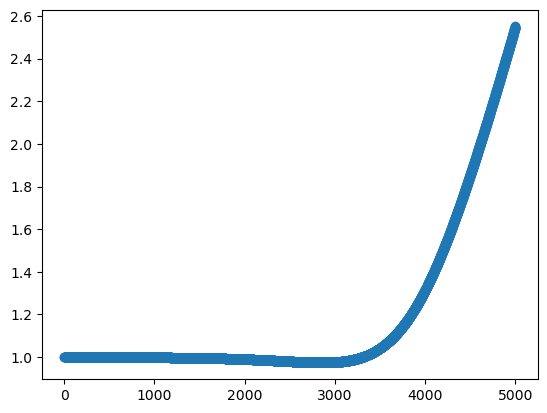

In [50]:
ells = np.array([l for l in range(2, 5000)])
om = fid_ombh2 + fid_omch2
oms = np.ones(np.shape(ells)) * om
plt.scatter(ells, func((ells, oms), 1))